KMeans https://bcho.tistory.com/1203 [조대협의 블로그]

In [1]:
import pandas as pd
from pandas import DataFrame

from sklearn.cluster import DBSCAN, KMeans 

import matplotlib.pyplot  as plt

In [2]:
Raw_Data = pd.read_csv("./raw_data.CSV")
Raw_Data.columns = ["Review", "Rate", "1", "2", "3", "4", "5"]

In [3]:
clusterData = Raw_Data.copy()

del clusterData['Review']
del clusterData['Rate']

In [4]:
DBClustering = DBSCAN(eps=0.5, min_samples=4)

DBclusterData = DBClustering.fit(clusterData)

In [5]:
DBpredict = pd.DataFrame(DBclusterData.labels_)
DBpredict.columns=['DBpredict']

In [6]:
KMClustering = KMeans(n_clusters=3,algorithm='auto')

KMClustering.fit(clusterData)

KMpredict = pd.DataFrame(KMClustering.predict(clusterData))

KMpredict.columns=['KMpredict']

In [7]:
result = pd.concat([Raw_Data,KMpredict, DBpredict],axis=1)

result.head()

,Review,Rate,1,2,3,4,5,KMpredict,DBpredict
0,제발 리뷰 솔직하게 씁시다 닭인지 병아리인지 모르겠고 본점이라면서 짱깨 집도 같이 ...,1,0,1,0,0,0,0,0
1,맛은 있는데 치킨이 진짜 너무 짜게 식어서 옴 먹는데 이거 항의할까 말까 고민하다가...,2,0,0,0,0,0,0,1
2,불고기버거 단품 2개와 한우버거 세트를 주문했는데 콜라와 포테이토가 빠진 단품 3개...,1,0,0,0,0,0,0,1
3,말도 없이 배달 엄청 늦어짐,1,0,0,1,0,0,2,2
4,순두부찌개는 너무 짠맛만 나고 물 넣어서 전자레인지 돌려먹었어요 그냥 딱 쉰 김치 ...,2,0,0,0,0,0,0,1


In [8]:
result.to_csv("./result.csv", sep=',', na_rep='NaN', encoding='cp949')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

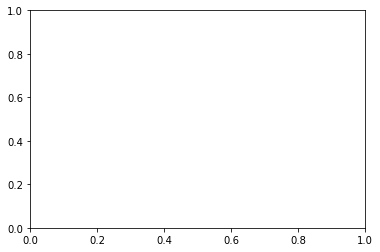

In [11]:
plt.scatter(result['1'],result['2'], result['3'],result['4'],result['5'],alpha=0.5)

plt.show()